In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('insurance_claims.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df['policy_number'].nunique()

1000

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df.shape

(1000, 40)

# Drawing graphs to understand the data

<Axes: xlabel='fraud_reported'>

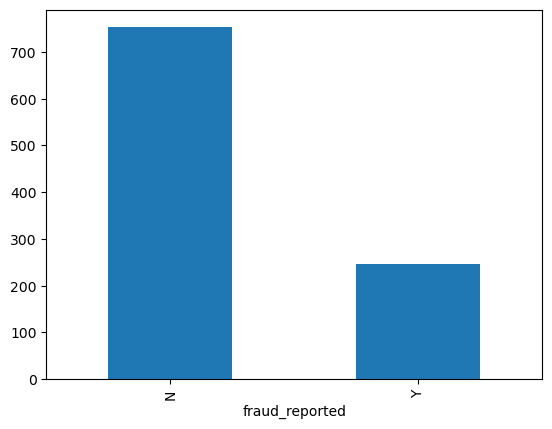

In [8]:
df_count_fraud = df.groupby(['fraud_reported']).count()
df_fraud = df_count_fraud['policy_number']
df_fraud.plot.bar(x='Fraud Reported', y='Count')

<Axes: xlabel='insured_education_level'>

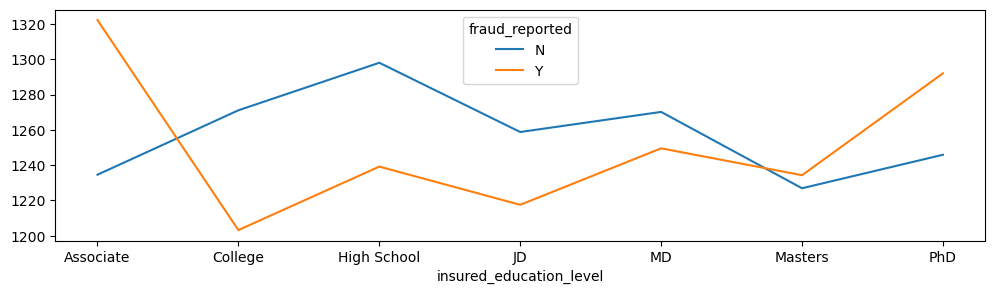

In [9]:
fig, ax = plt.subplots(figsize=(12,3))
df_avg_prem = df.groupby(['insured_education_level', 'fraud_reported'])['policy_annual_premium'].mean()
df_avg_prem.unstack().plot(ax=ax)

<Axes: xlabel='insured_occupation'>

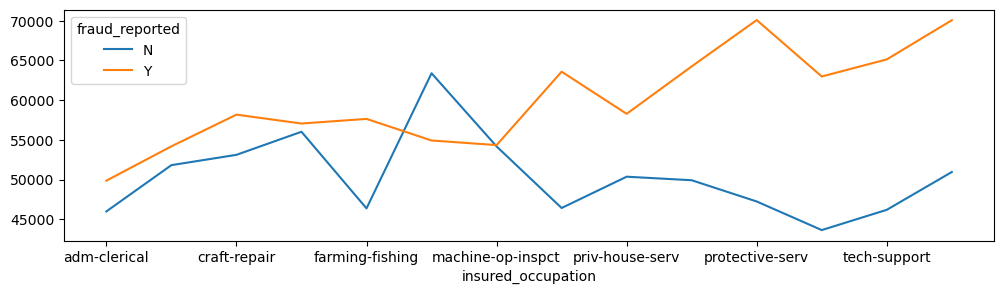

In [10]:
fig, ax = plt.subplots(figsize=(12,3))
df.groupby(['insured_occupation', 'fraud_reported'])['total_claim_amount'].mean().unstack().plot(ax=ax)

<Axes: xlabel='insured_occupation'>

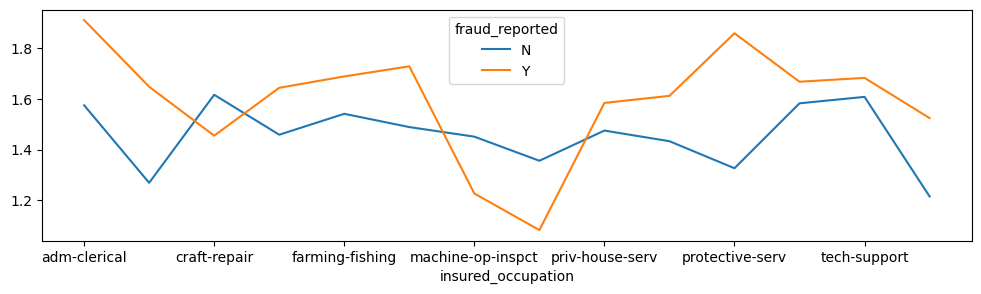

In [11]:
fig, ax = plt.subplots(figsize=(12,3))
df.groupby(['insured_occupation', 'fraud_reported'])['witnesses'].mean().unstack().plot(ax=ax)

<Axes: xlabel='insured_occupation'>

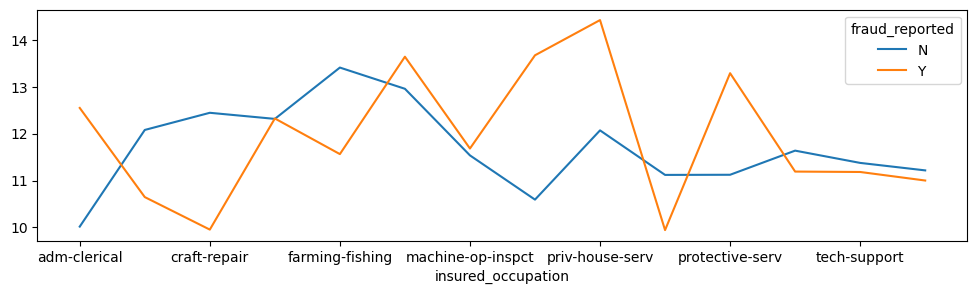

In [12]:
fig, ax = plt.subplots(figsize=(12,3))
df.groupby(['insured_occupation', 'fraud_reported'])['incident_hour_of_the_day'].mean().unstack().plot(ax=ax)

Correlation graphs to understand the relations between the integer columns. This also helps us in eliminating the columns that are of almost no use to the data. As the color deepens, it shows that the columns do not have any relations with each other. We have later removed the columns that add no value to our model. 

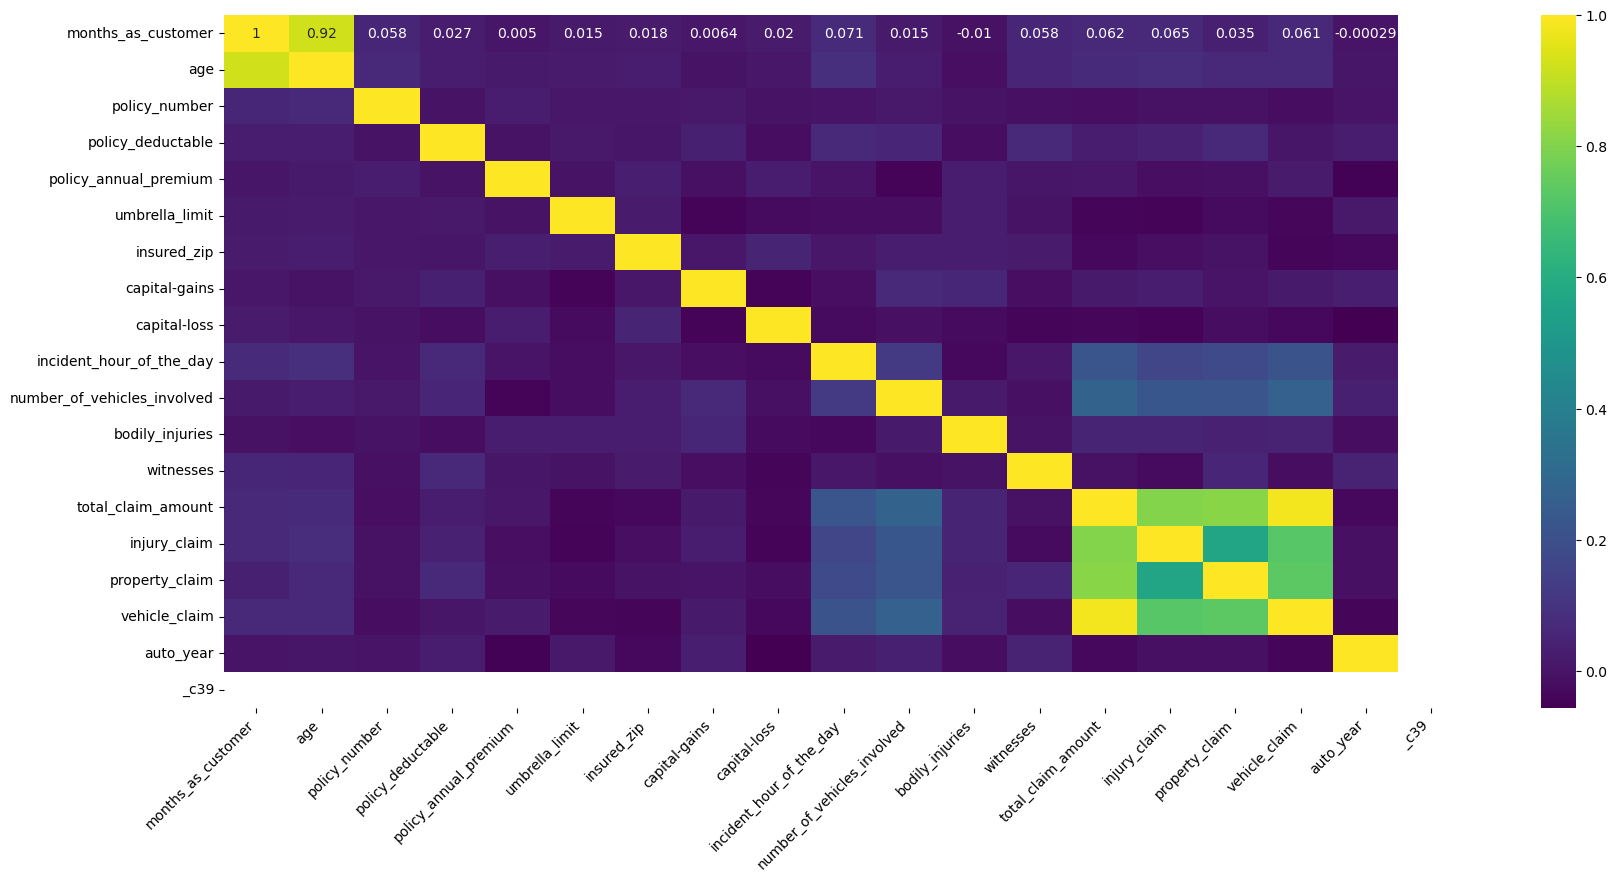

In [13]:
plt.figure(figsize=(20, 9))
num_df = df.select_dtypes(include=np.number)
corr=num_df.corr()

ax = sns.heatmap(
    corr, cmap='viridis', annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

In [14]:
#Remove Less Correlated Columns
deleteCols = ["policy_bind_date", "insured_zip", "incident_location", "incident_date", "_c39"]
data = df.drop(deleteCols, axis=1)
data.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,MALE,MD,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [15]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# Converting the string objects to integers

This is done by first mapping the df['fraud_reported'] column into Y and N. Next, we one-hot code the different columns by running them in a for loop. After getting dummies(eg. if a column('Animals') has contents like 'Cat' and 'Dog', the dummies would replace the contents and create new columns with integer data that is easier for the model to follow. Later the following code would delete the actual column having replaced with the new ones. It would become columns like ('Animals_Cat') and have 0 in places where the dog was written in the original column and 1 in the columns where Cat was written. SImilarly, the new column ('Animals_Dog') would have 0 in places where Cat was originally written in the actual column and have 1 in places Dog was written.

In [16]:
data['fraud_reported'] = data['fraud_reported'].map( {'Y':1, 'N':0})

In [17]:
to_del=[]
for i in data.columns:
    if (data[i].dtype==object):
        data=pd.concat([data, pd.get_dummies(data[i],prefix=i)],axis=1)
        to_del.append(i)
        
data = data.drop(to_del, axis=1)

In [18]:
data.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,1000,1406.91,0,53300,0,5,1,...,False,False,False,False,False,False,False,False,False,False
1,228,42,342868,2000,1197.22,5000000,0,0,8,1,...,False,False,False,False,False,False,False,False,False,False
2,134,29,687698,2000,1413.14,5000000,35100,0,7,3,...,False,True,False,False,False,False,False,False,False,False
3,256,41,227811,2000,1415.74,6000000,48900,-62400,5,1,...,False,False,False,False,False,True,False,False,False,False
4,228,44,367455,1000,1583.91,6000000,66000,-46000,20,1,...,False,False,True,False,False,False,False,False,False,False


Now we shift the column of 'Fraud_reported' to the end of the DataFrame. This is done to help us in separating the test results when training the columns 

In [19]:
col_to_move = 'fraud_reported'

# Get the list of columns
cols = list(data.columns)

# Remove the column and append it to the end
cols.append(cols.pop(cols.index(col_to_move)))

# Reindex the DataFrame with the new column order
data = data[cols]

data

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported
0,328,48,521585,1000,1406.91,0,53300,0,5,1,...,False,False,False,False,False,False,False,False,False,1
1,228,42,342868,2000,1197.22,5000000,0,0,8,1,...,False,False,False,False,False,False,False,False,False,1
2,134,29,687698,2000,1413.14,5000000,35100,0,7,3,...,True,False,False,False,False,False,False,False,False,0
3,256,41,227811,2000,1415.74,6000000,48900,-62400,5,1,...,False,False,False,False,True,False,False,False,False,1
4,228,44,367455,1000,1583.91,6000000,66000,-46000,20,1,...,False,True,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,0,0,20,1,...,False,False,False,False,False,False,False,False,False,0
996,285,41,186934,1000,1436.79,0,70900,0,23,1,...,False,False,False,False,False,False,False,False,False,0
997,130,34,918516,500,1383.49,3000000,35100,0,4,3,...,False,False,False,False,False,False,False,False,False,0
998,458,62,533940,2000,1356.92,5000000,0,0,2,1,...,False,False,False,False,False,False,False,False,False,0


We will now consider the column 'Policy_Number' as the Unique ID with which we will identify the columns. This is because this columns all the unique values whereas the other columns mostly have duplicate values which make it hard to pinpoint to a particular row in the dataset. This is also why we will sort the dataset in the ascending order of the 'Policy_Number'.

In [20]:
data= data.sort_values(by='policy_number')

In [21]:
# Move column 'C' to the front
col_to_move = 'policy_number'
data = data[[col_to_move] + [col for col in data if col != col_to_move]]

In [22]:
data.head()

,policy_number,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported
663,100804,172,33,1000,1459.96,6000000,41300,-42000,15,3,...,False,False,False,False,False,False,False,False,False,0
863,101421,91,26,1000,1022.46,0,52700,0,15,3,...,False,False,False,False,False,False,True,False,False,0
5,104594,256,39,1000,1351.10,0,0,0,19,3,...,False,False,False,False,False,False,False,False,False,1
589,106186,75,25,1000,1389.86,0,0,0,23,2,...,False,False,False,False,False,False,False,False,False,0
337,106873,159,37,1000,894.40,0,0,-53700,13,1,...,True,False,False,False,False,False,False,False,False,0


In [23]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,100804,172,33,1000,1459.96,6000000,41300,-42000,15,3,...,False,False,False,False,False,False,False,False,False,False
1,101421,91,26,1000,1022.46,0,52700,0,15,3,...,False,False,False,False,False,False,False,True,False,False
2,104594,256,39,1000,1351.1,0,0,0,19,3,...,False,False,False,False,False,False,False,False,False,False
3,106186,75,25,1000,1389.86,0,0,0,23,2,...,False,False,False,False,False,False,False,False,False,False
4,106873,159,37,1000,894.4,0,0,-53700,13,1,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996253,116,30,500,951.46,0,0,-35500,8,3,...,False,False,False,False,False,False,False,False,False,False
996,996850,246,44,1000,1397.0,0,0,0,6,1,...,False,False,False,False,False,False,False,False,False,False
997,998192,210,35,500,1433.24,0,0,-19500,11,3,...,False,False,False,False,False,False,False,False,False,False
998,998865,80,28,1000,1740.57,0,0,-18600,3,1,...,False,False,False,False,False,False,False,False,False,False


# Preprocessing of the data

This helps in making it easier for the model to train and then evaluate the model better. Instead of the data ranging in large limits, scaling them makes them in the range of 0 to 1.

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,0.000000,0.359081,0.311111,0.333333,0.635976,0.636364,0.410945,0.621962,0.652174,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000687,0.189979,0.155556,0.333333,0.364954,0.090909,0.524378,1.000000,0.652174,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.004218,0.534447,0.444444,0.333333,0.568539,0.090909,0.000000,1.000000,0.826087,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005989,0.156576,0.133333,0.333333,0.592550,0.090909,0.000000,1.000000,1.000000,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.006754,0.331942,0.400000,0.333333,0.285623,0.090909,0.000000,0.516652,0.565217,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Using Self-Organised Maps and Artificial Neural Networks (Deep Learning)

Using Self-organised Maps helps in identifying the probable frauds via a grap containing red circles and green squares. The red circles denote the probable fraud cases and the green squares show the probable non-fraud cases. The boxes in which both the red circles and green squares are present, it shows that the model is not entirely sure whether to place them as fraud or non-fraud.

We will have to give the coordinates where the red circles are concentrated and are relatively whiter in shade. Running the cells everytime changes the graph. Hence, we need to give the new coordinates everytime to the model to get good enough accuracy

In [25]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 161, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 20000)

In [26]:
# Weights are:
wts = som.get_weights
# Returns the distance map from the weights:
som.distance_map()

array([[0.35060031, 0.52228202, 0.62610542, 0.65904706, 0.56825959,
        0.54218156, 0.52330721, 0.59030845, 0.55476737, 0.35607864],
       [0.5280602 , 0.89374623, 0.8979999 , 0.93582033, 0.91239613,
        0.87671703, 0.82964711, 0.88565148, 0.88627707, 0.53021804],
       [0.49779159, 0.78058218, 0.90810843, 0.96766387, 0.88069545,
        0.85366611, 0.88128422, 0.87409893, 0.90776228, 0.54402119],
       [0.48040617, 0.77220807, 0.87157833, 0.96281021, 0.85904209,
        0.83072403, 0.80730447, 0.92314939, 0.86820368, 0.52781605],
       [0.47165621, 0.7570976 , 0.99889601, 1.        , 0.93226696,
        0.82543909, 0.83627307, 0.93028569, 0.91728391, 0.5540835 ],
       [0.53095596, 0.91727921, 0.91590088, 0.9774488 , 0.97970594,
        0.9104072 , 0.89695956, 0.84435994, 0.83867181, 0.55922218],
       [0.53464569, 0.89792432, 0.82707492, 0.85312943, 0.87824035,
        0.87940606, 0.82790792, 0.83727647, 0.8456877 , 0.5495998 ],
       [0.52059467, 0.89338387, 0.7820097

# Understanding the SOM Graph

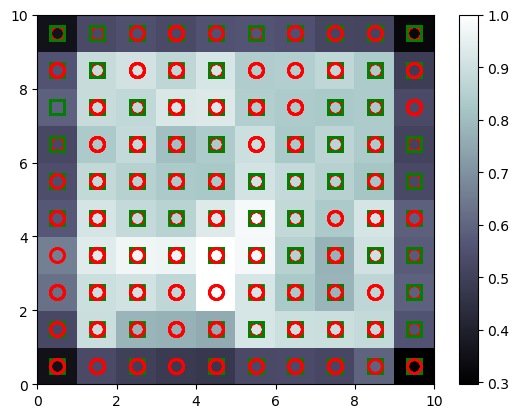

In [27]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [28]:
mappings = som.win_map(X)

In [29]:
frauds = np.concatenate((mappings[(4,2)], mappings[(4,7)]), axis = 0)

In [30]:
frauds

array([[0.3959356 , 0.59916493, 0.48888889, ..., 0.        , 0.        ,
        0.        ],
       [0.47567355, 0.77244259, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.60587049, 0.50939457, 0.46666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.50981326, 0.14613779, 0.15555556, ..., 0.        , 0.        ,
        0.        ],
       [0.66572375, 0.01670146, 0.35555556, ..., 0.        , 0.        ,
        0.        ],
       [0.9467056 , 0.29645094, 0.24444444, ..., 0.        , 0.        ,
        0.        ]])

To get the actual values, we need to reverse scale the values, that is, to make the data return to their original limits instead of 0 to 1 that we did while scaling the values

In [31]:
frauds1=sc.inverse_transform(frauds)

In [32]:
frauds1

array([[4.56604e+05, 2.87000e+02, 4.10000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.28259e+05, 3.70000e+02, 5.50000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.45258e+05, 2.44000e+02, 4.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [5.58938e+05, 7.00000e+01, 2.60000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.99044e+05, 8.00000e+00, 3.50000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [9.51543e+05, 1.42000e+02, 3.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [33]:
df2=pd.DataFrame(frauds1)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,456604.0,287.0,41.0,2000.0,968.74,0.0,0.0,-49000.0,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,528259.0,370.0,55.0,2000.0,1389.13,7000000.0,0.0,-53200.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,645258.0,244.0,40.0,2000.0,1267.81,5000000.0,0.0,0.0,10.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,866931.0,175.0,34.0,1000.0,1123.87,8000000.0,0.0,0.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,979285.0,154.0,36.0,2000.0,1313.51,7000000.0,68500.0,0.0,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
data.head()

,policy_number,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported
663,100804,172,33,1000,1459.96,6000000,41300,-42000,15,3,...,False,False,False,False,False,False,False,False,False,0
863,101421,91,26,1000,1022.46,0,52700,0,15,3,...,False,False,False,False,False,False,True,False,False,0
5,104594,256,39,1000,1351.10,0,0,0,19,3,...,False,False,False,False,False,False,False,False,False,1
589,106186,75,25,1000,1389.86,0,0,0,23,2,...,False,False,False,False,False,False,False,False,False,0
337,106873,159,37,1000,894.40,0,0,-53700,13,1,...,True,False,False,False,False,False,False,False,False,0


In [35]:
print('Fraud Customer IDs')
for i in frauds1[:, 2]:
  print(int(i))

Fraud Customer IDs
41
55
40
34
36
31
26
56
43
39
55
26
26
35
30


In [36]:
data['policy_annual_premium'].nunique()

991

In [37]:
k = 0
is_fraud_als0 = np.zeros(len(data))
# Iterate through the rows of `data`

for i in range(len(data)):
    #print(int(df2.iloc[k,2]),'\t',data.iloc[i,2],'\t','i =',i,'\t and k =',k)
    if (int(df2.iloc[k, 2]) == data.iloc[i, 2]) or (int(df2.iloc[k, 2]) == data.iloc[i, 2]+1) or (int(df2.iloc[k, 2]) == data.iloc[i, 2]-1):  # Compare the 'C' column (index 2)
        #print("yes",'\t','i =',i,'\t and k =',k)
        is_fraud_als0[i] = 1
        #print(is_fraud_als0[i],'\t done')
        k += 1

IndexError: index 15 is out of bounds for axis 0 with size 15

In [38]:
np.sum(is_fraud_als0==1)

15

In [39]:
is_fraud_als0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [41]:
customers = data.iloc[:, 1:].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [42]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(customers, is_fraud_als0, batch_size = 3, epochs = 27)

Epoch 1/27
334/334 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8521 - loss: 0.5739
Epoch 2/27
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9861 - loss: 0.2802
Epoch 3/27
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9903 - loss: 0.1304
Epoch 4/27
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9819 - loss: 0.0902
Epoch 5/27
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9896 - loss: 0.0611
Epoch 6/27
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0568
Epoch 7/27
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9874 - loss: 0.0468
Epoch 8/27
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0375
Epoch 9/27
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9811 - loss: 0.0483
Epoch 10/27
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9871 - loss: 0.0389
Epoch 11/27
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9903 - loss: 0.0287
Epoch 12/27
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [43]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((data.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [44]:
print(y_pred)

[[2.30223000e+05 8.47152972e-15]
 [8.18413000e+05 4.10948741e-14]
 [9.00628000e+05 1.87787232e-13]
 ...
 [1.71147000e+05 3.47455412e-01]
 [2.61905000e+05 3.47455412e-01]
 [3.09323000e+05 3.47455412e-01]]


In [45]:
df= pd.DataFrame(y_pred,columns=['Policy_Num','Pred'])
df.head()

,Policy_Num,Pred
0,230223.0,8.471530e-15
1,818413.0,4.109487e-14
2,900628.0,1.877872e-13
3,641934.0,5.031749e-13
4,889883.0,5.165063e-13


In [46]:
is_fraud_als0=is_fraud_als0.reshape(len(is_fraud_als0),1)
y=y.reshape(len(y),1)
print(np.concatenate((is_fraud_als0, y),1))

[[0. 0.]
 [0. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 0.]
 [0. 1.]]


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y, is_fraud_als0)
print(cm)
print(classification_report(is_fraud_als0,y))
accuracy_score(y, is_fraud_als0)

[[741  12]
 [244   3]]
              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85       985
         1.0       0.01      0.20      0.02        15

    accuracy                           0.74      1000
   macro avg       0.50      0.48      0.44      1000
weighted avg       0.97      0.74      0.84      1000



0.744

In [48]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 78)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
import tensorflow as tf

In [51]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 5, epochs = 25)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4197 - loss: 1.1556
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4983 - loss: 0.8896
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6339 - loss: 0.7178
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7319 - loss: 0.6225
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8188 - loss: 0.5671
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8395 - loss: 0.5330
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8640 - loss: 0.5062
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.4733
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8759 - loss: 0.4548
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.4412
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9046 - loss: 0.4088
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [52]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[134  13]
 [ 24  29]]


0.815

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       147
           1       0.69      0.55      0.61        53

    accuracy                           0.81       200
   macro avg       0.77      0.73      0.74       200
weighted avg       0.81      0.81      0.81       200



# Using Machine Learning Models to predict 

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,precision_score

X = data.drop(['fraud_reported'], axis=1)
y = data['fraud_reported']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=57)

Text(0, 0.5, 'Error Rate')

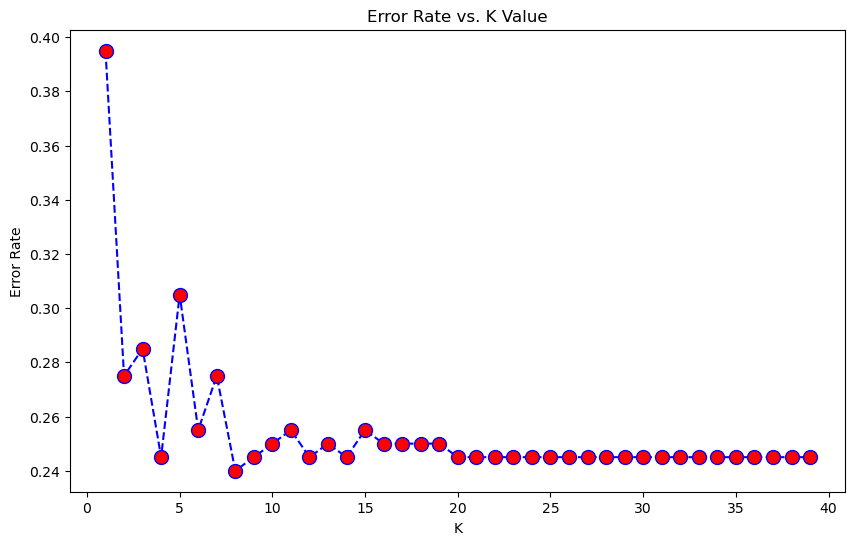

In [56]:
from sklearn import neighbors
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(classification_report(y_test,pred))
print('Score:')
print(knn.score(X_test,y_test))

WITH K=20


              precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200

Score:
0.755


In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
knn_accuracy = scores.mean()

print('Cross-Validated Accuracy: %0.2f' % knn_accuracy)

Cross-Validated Accuracy: 0.71


In [59]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('Score:')
print(dtree.score(X_test,y_test))

[[135  16]
 [ 18  31]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       151
           1       0.66      0.63      0.65        49

    accuracy                           0.83       200
   macro avg       0.77      0.76      0.77       200
weighted avg       0.83      0.83      0.83       200

Score:
0.83


In [60]:
scores = cross_val_score(dtree, X, y, cv=17, scoring='accuracy')
dt_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % dt_accuracy)

Cross-Validated Accuracy: 0.77


In [61]:
from IPython.display import Image  
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(data.columns[1:])
len(features)

161

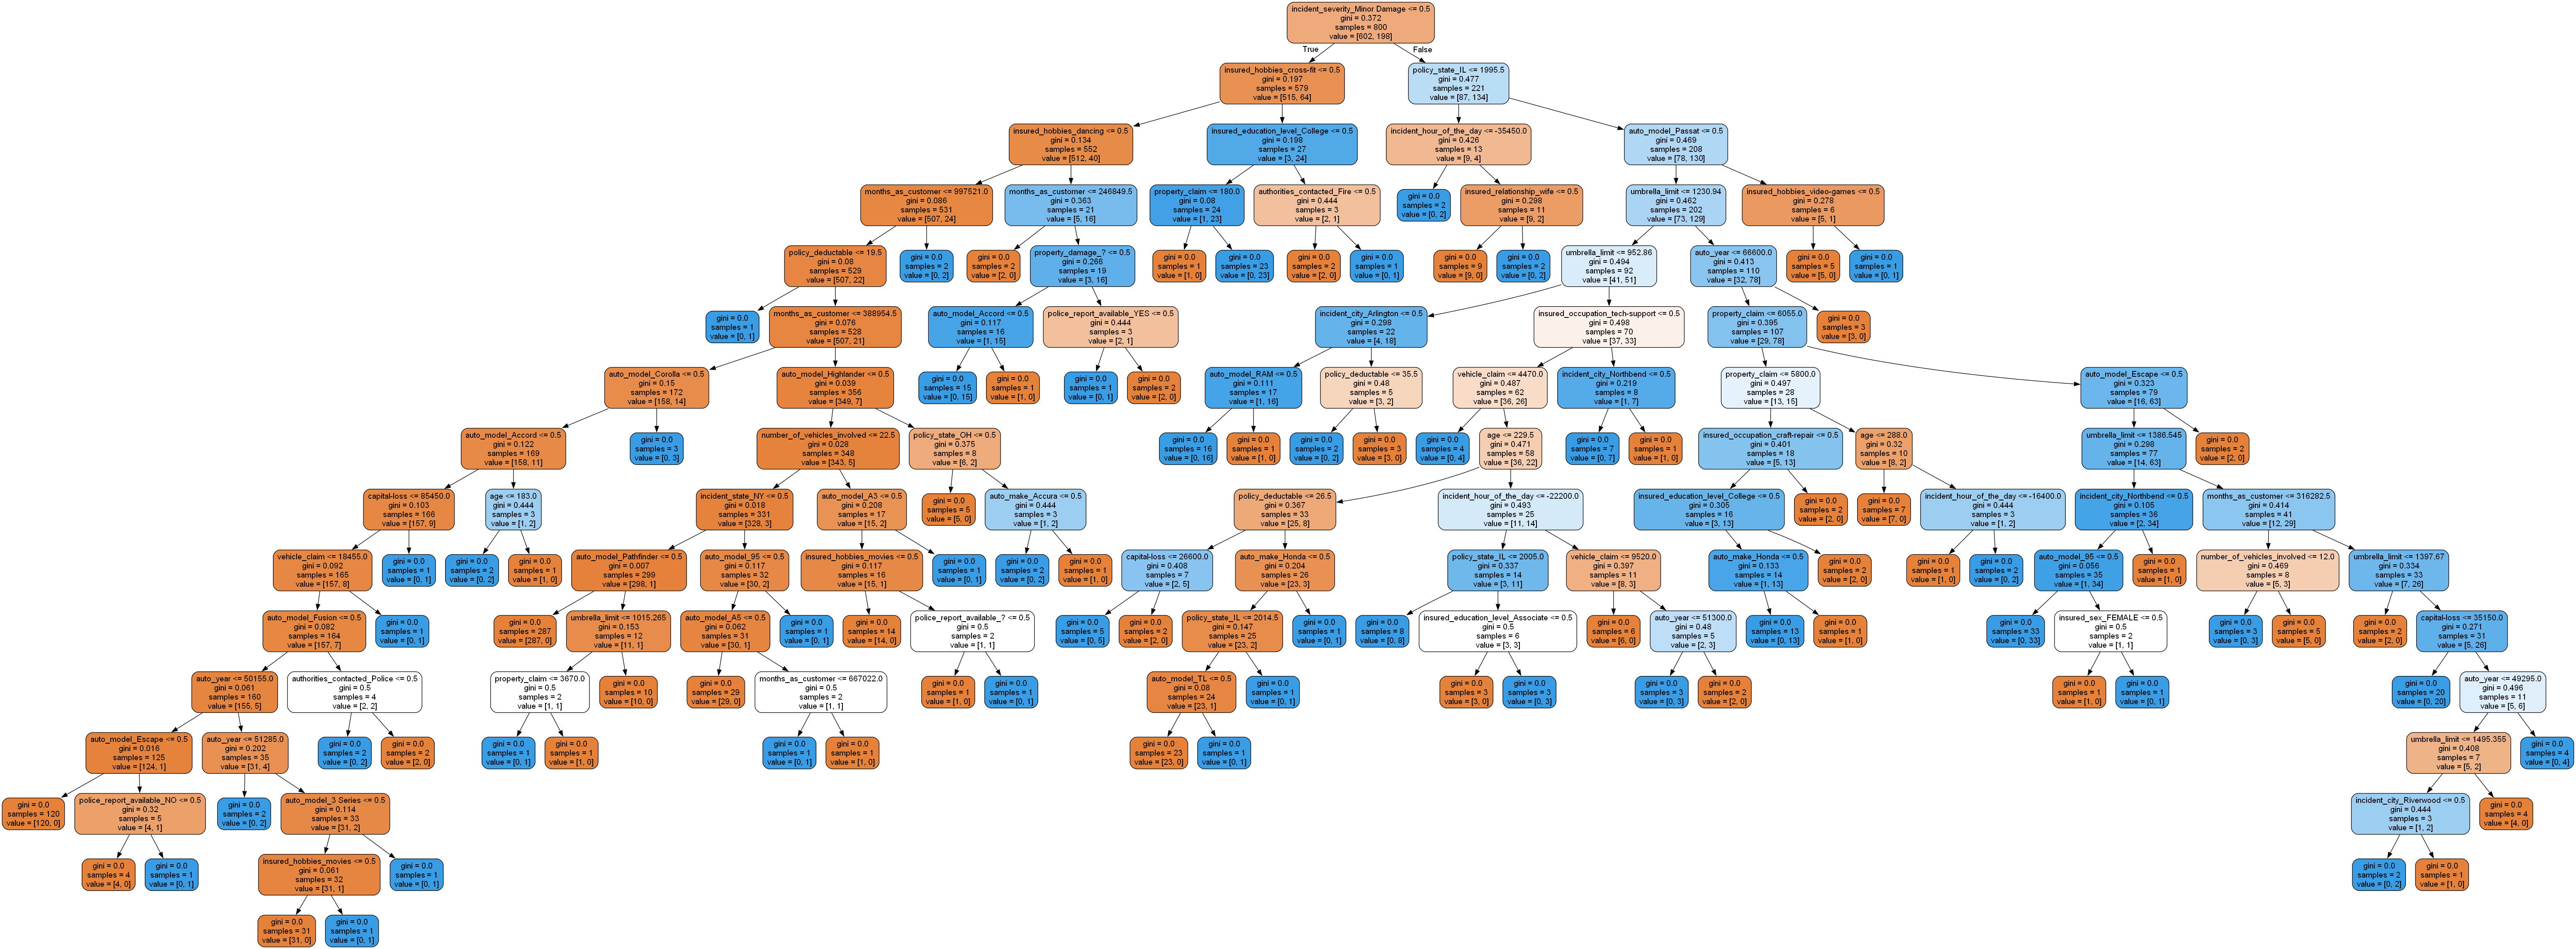

In [62]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/HP/Downloads/graphvizzzz/Graphviz-11.0.0-win64/bin/'                                                                                                                                                                                                                                                        

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
print('Score:')
print(rfc.score(X_test,y_test))

[[142   9]
 [ 32  17]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       151
           1       0.65      0.35      0.45        49

    accuracy                           0.80       200
   macro avg       0.73      0.64      0.66       200
weighted avg       0.78      0.80      0.77       200

Score:
0.795


In [65]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions1 = model.predict(X_test)
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))
print('Score:')
print(model.score(X_test,y_test))

[[151   0]
 [ 49   0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200

Score:
0.755


In [66]:
scores = cross_val_score(model, X, y, cv=20, scoring='accuracy')
svm_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % svm_accuracy)

Cross-Validated Accuracy: 0.75


In [67]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.756 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.756 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.756 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.756 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.756 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.756 total time=   0.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.756 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.756 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.756 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.756 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.1s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [68]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [69]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

In [70]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))
print('Score:')
print(grid.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200

Score:
0.755


In [71]:
from imblearn.ensemble import BalancedRandomForestClassifier
#Balanced Random Forest
BRFClassifier=BalancedRandomForestClassifier(n_estimators=200)
BRFClassifier.fit(X_train, y_train) 
BRF_predictions = BRFClassifier.predict(X_test)
print(classification_report(y_test,BRF_predictions))
print("Balanced Random Forest Score :")
BRFClassifier.score(X_test,y_test)

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       151
           1       0.66      0.90      0.76        49

    accuracy                           0.86       200
   macro avg       0.81      0.87      0.83       200
weighted avg       0.89      0.86      0.87       200

Balanced Random Forest Score :


0.86

In [72]:
acc_score_brfc = []

# Will take some time
for i in range(1,200):
    brfc_i = BalancedRandomForestClassifier(n_estimators=i)
    brfc_i.fit(X_train, y_train)
    brfc_i_pred = brfc_i.predict(X_test)
    acc_score_brfc.append((brfc_i.score(X_test,y_test)))

Text(0, 0.5, 'Acc_score')

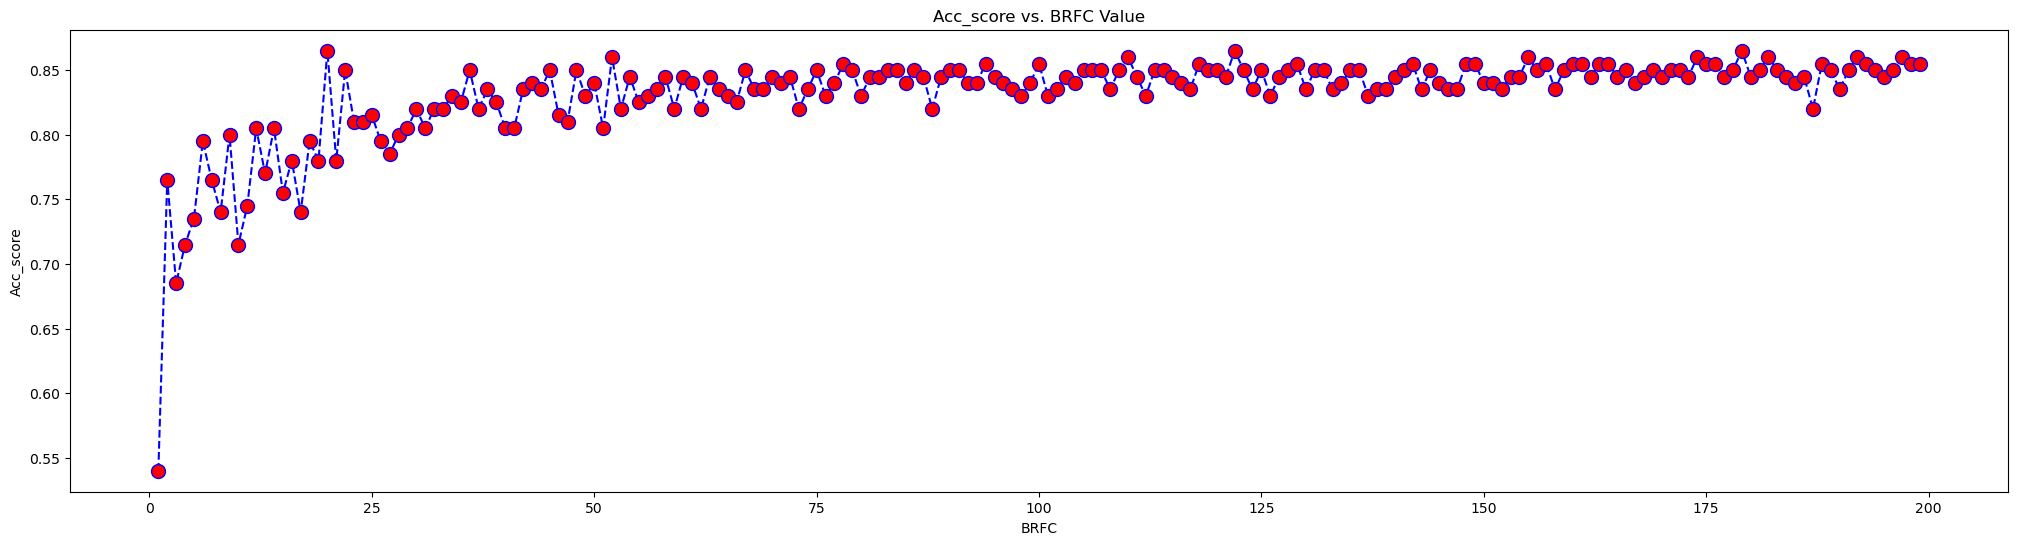

In [73]:
plt.figure(figsize=(25,6))
plt.plot(range(1,200),acc_score_brfc,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Acc_score vs. BRFC Value')
plt.xlabel('BRFC')
plt.ylabel('Acc_score')

In [74]:
brfc_df= pd.DataFrame({'i':range(1,200),'acc_score':acc_score_brfc})
brfc_df=brfc_df.sort_values(by='acc_score', ascending=False)
brfc_df[brfc_df['acc_score']>0.82].head()

,i,acc_score
178,179,0.865
19,20,0.865
121,122,0.865
196,197,0.860
109,110,0.860


In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print('Score:')
print(rfc.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       151
           1       0.70      0.47      0.56        49

    accuracy                           0.82       200
   macro avg       0.77      0.70      0.72       200
weighted avg       0.81      0.82      0.81       200

Score:
0.82


In [76]:
acc_score_rfc = []

# Will take some time
for i in range(1,200):
    rfc_i = RandomForestClassifier(n_estimators=i)
    rfc_i.fit(X_train, y_train)
    rfc_i_pred = rfc_i.predict(X_test)
    acc_score_rfc.append((rfc_i.score(X_test,y_test)))

Text(0, 0.5, 'Acc_score')

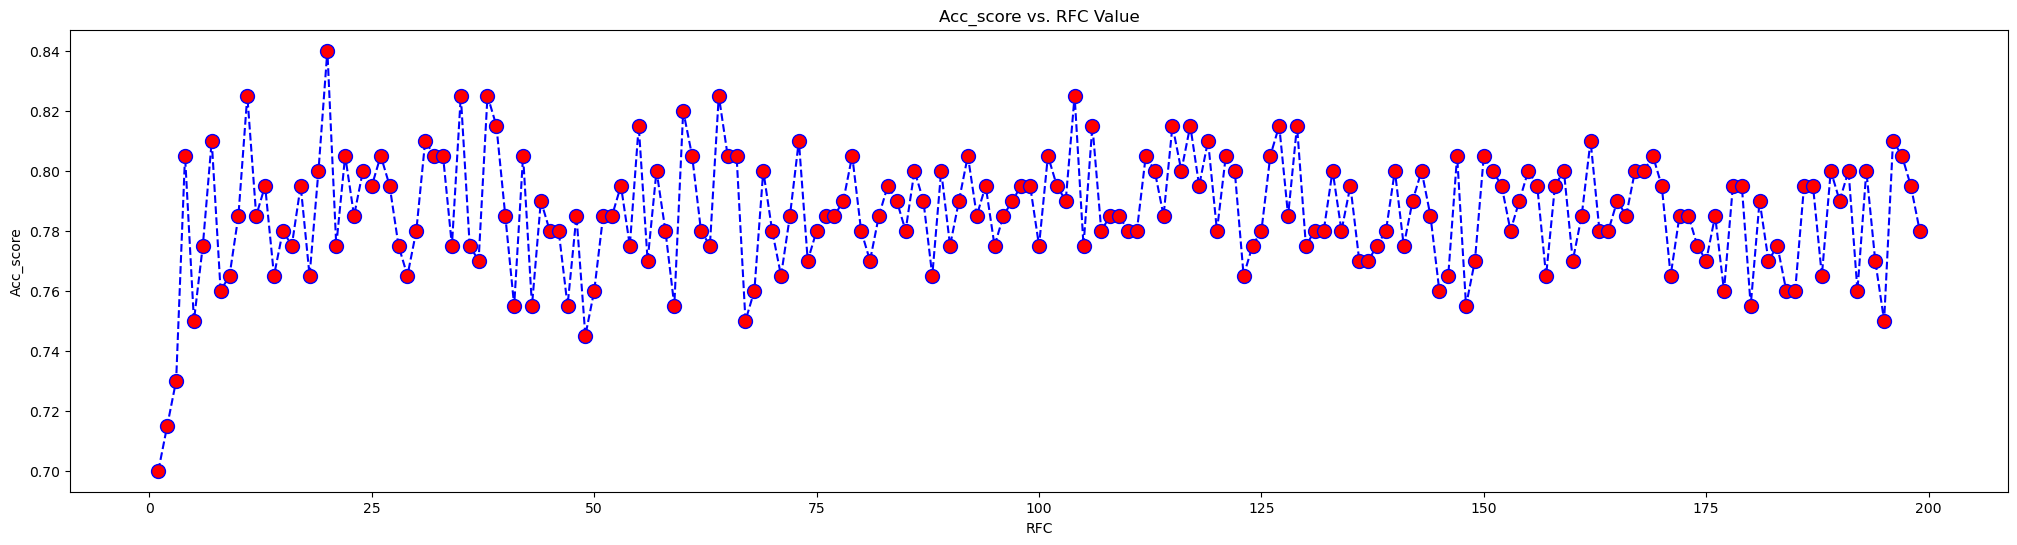

In [77]:
plt.figure(figsize=(25,6))
plt.plot(range(1,200),acc_score_rfc,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Acc_score vs. RFC Value')
plt.xlabel('RFC')
plt.ylabel('Acc_score')

In [78]:
rfc_df= pd.DataFrame({'i':range(1,200),'acc_score':acc_score_rfc})
rfc_df=rfc_df.sort_values(by='acc_score', ascending=False)
rfc_df[rfc_df['acc_score']>0.82].head()

,i,acc_score
19,20,0.840
63,64,0.825
37,38,0.825
34,35,0.825
103,104,0.825


In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X_train, y_train) 
lda_pred = lda.predict(X_test)
print(classification_report(y_test,lda_pred))
print("Linear Discriminant Analysis Score :")
lda.score(X_test,y_test)


              precision    recall  f1-score   support

           0       0.93      0.90      0.91       151
           1       0.72      0.78      0.75        49

    accuracy                           0.87       200
   macro avg       0.82      0.84      0.83       200
weighted avg       0.87      0.87      0.87       200

Linear Discriminant Analysis Score :


0.87

In [80]:
from sklearn.naive_bayes import BernoulliNB
#Naive Bayes Classifier
NBClassifier = BernoulliNB()
NBClassifier.fit(X_train, y_train)
print("Naive Bayes Classifier Score :")
NBClassifier.score(X_test,y_test)

Naive Bayes Classifier Score :


0.84

In [94]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=29)
xgb.fit(X_train, y_train) 
xgb_predictions = xgb.predict(X_test)
print(classification_report(y_test,xgb_predictions))
print("XGBoost Score :")
xgb.score(X_test,y_test)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       151
           1       0.71      0.61      0.66        49

    accuracy                           0.84       200
   macro avg       0.80      0.77      0.78       200
weighted avg       0.84      0.84      0.84       200

XGBoost Score :


0.845

In [82]:
acc_score_xg = []

# Will take some time
for i in range(1,200):
    xg_i = XGBClassifier(n_estimators=i)
    xg_i.fit(X_train, y_train)
    xg_i_pred = xg_i.predict(X_test)
    acc_score_xg.append((xg_i.score(X_test,y_test)))

Text(0, 0.5, 'Acc_score')

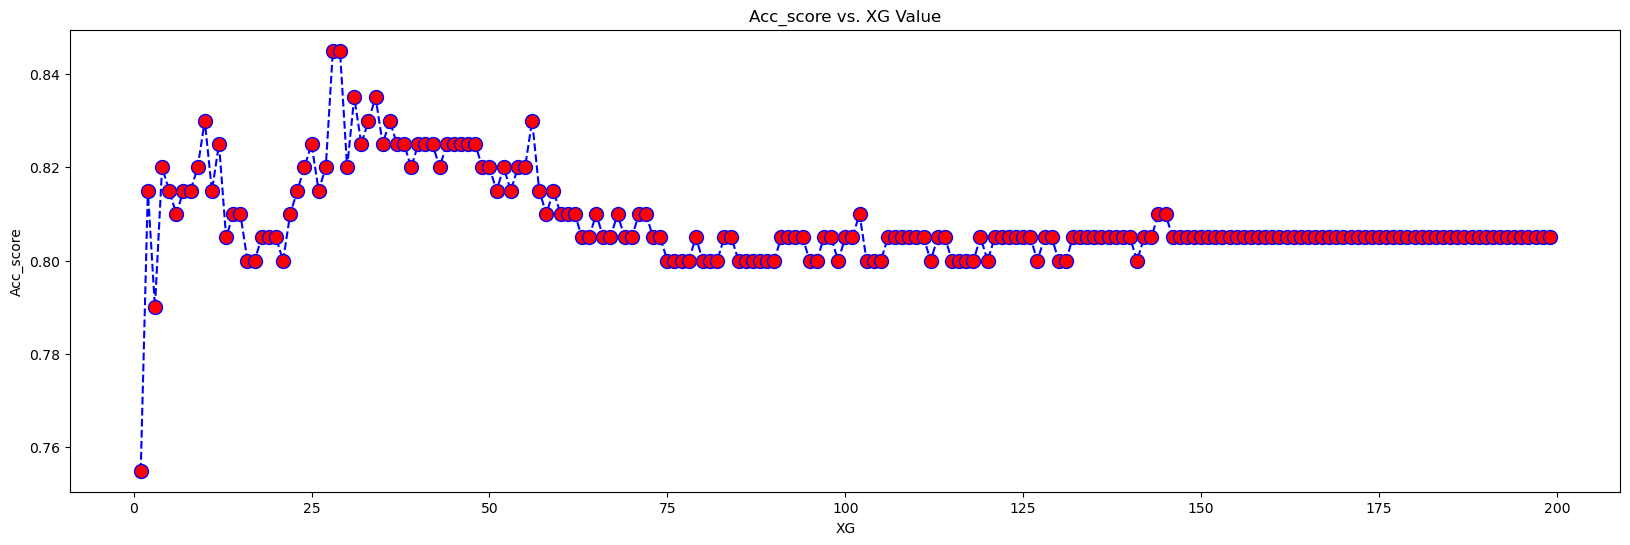

In [83]:
plt.figure(figsize=(20,6))
plt.plot(range(1,200),acc_score_xg,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Acc_score vs. XG Value')
plt.xlabel('XG')
plt.ylabel('Acc_score')

In [84]:
xg_df= pd.DataFrame({'i':range(1,200),'acc_score':acc_score_xg})
xg_df=rfc_df.sort_values(by='acc_score', ascending=False)
xg_df[rfc_df['acc_score']>0.82].head()

,i,acc_score
19,20,0.840
37,38,0.825
34,35,0.825
103,104,0.825
10,11,0.825


In [85]:
model_names=['KNeighborsClassifier(n_neighbors=20)','RandomForestClassifier','SVC','GridSearchCV',
            'BalancedRandomForestClassifier','DecisionTreeClassifier','LDA','BernoulliNB','XGBClassifier']

model_scores=[knn.score(X_test,y_test), rfc.score(X_test,y_test) ,model.score(X_test,y_test),grid.score(X_test,y_test),BRFClassifier.score(X_test,y_test),
             dtree.score(X_test,y_test),lda.score(X_test,y_test),NBClassifier.score(X_test,y_test),xgb.score(X_test,y_test)]

In [86]:
results_df = pd.DataFrame({
    'Model': model_names,
    'Score': model_scores
})
results_df=results_df.sort_values(by='Score',ascending=False)

results_df

,Model,Score
6,LDA,0.870
4,BalancedRandomForestClassifier,0.860
8,XGBClassifier,0.845
7,BernoulliNB,0.840
5,DecisionTreeClassifier,0.830
1,RandomForestClassifier,0.790
0,KNeighborsClassifier(n_neighbors=20),0.755
2,SVC,0.755
3,GridSearchCV,0.755


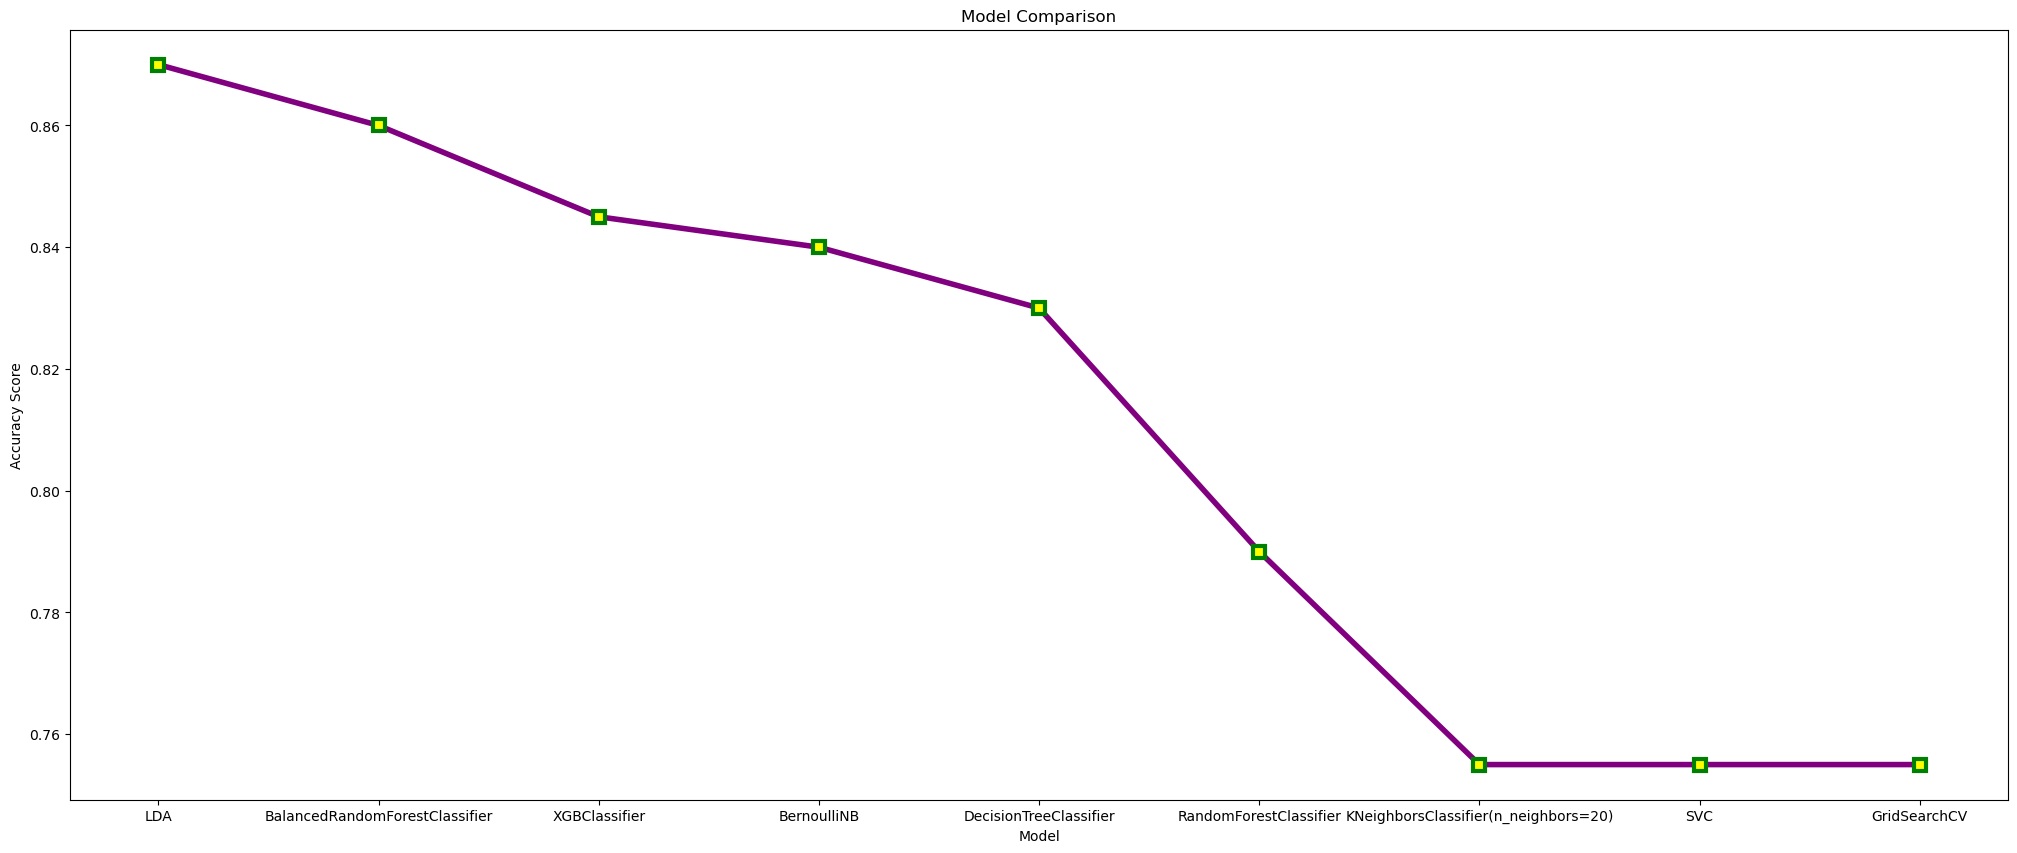

In [87]:
plt.figure(figsize=(25, 10))
plt.plot(results_df['Model'], results_df['Score'],color="purple", lw=4, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green")

# Adding title and labels
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')

# Display the plot
plt.show()

In [88]:
#XGBOOST model has better ROC Curve and Cross-validated accuracy, plot feature importance
def rf_feat_importance(m, df):
    return pd.DataFrame({'feature':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
def plot_fi(fi): 
    return fi.plot('feature', 'imp', 'barh', figsize=(15,7), legend=False)

fi = rf_feat_importance(xgb, X_train); fi[:15]

,feature,imp
80,incident_severity_Major Damage,0.106646
51,insured_hobbies_chess,0.077055
52,insured_hobbies_cross-fit,0.058013
149,auto_model_Neon,0.034759
98,incident_city_Northbend,0.026541
151,auto_model_Pathfinder,0.024338
123,auto_model_92x,0.017204
114,auto_make_Honda,0.017161
88,incident_state_NC,0.016811
57,insured_hobbies_kayaking,0.016373


<Axes: ylabel='feature'>

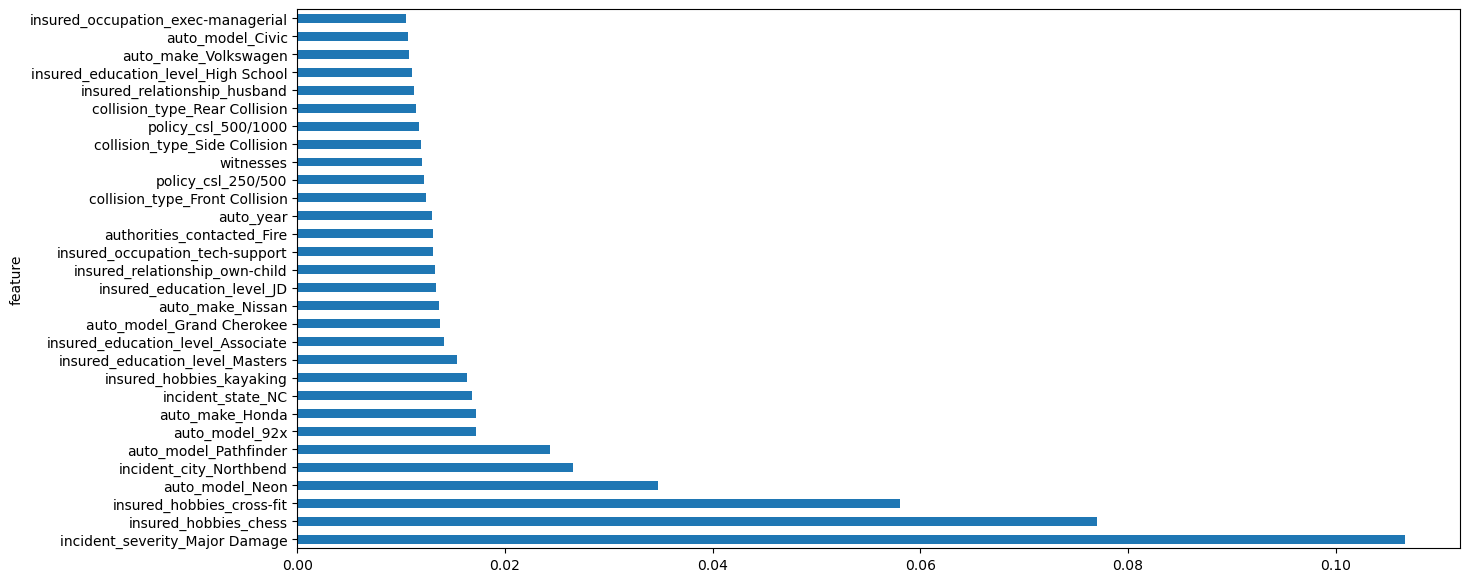

In [89]:
plot_fi(fi[:30])